In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns


In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
# California Housing Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Display basic statistics
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

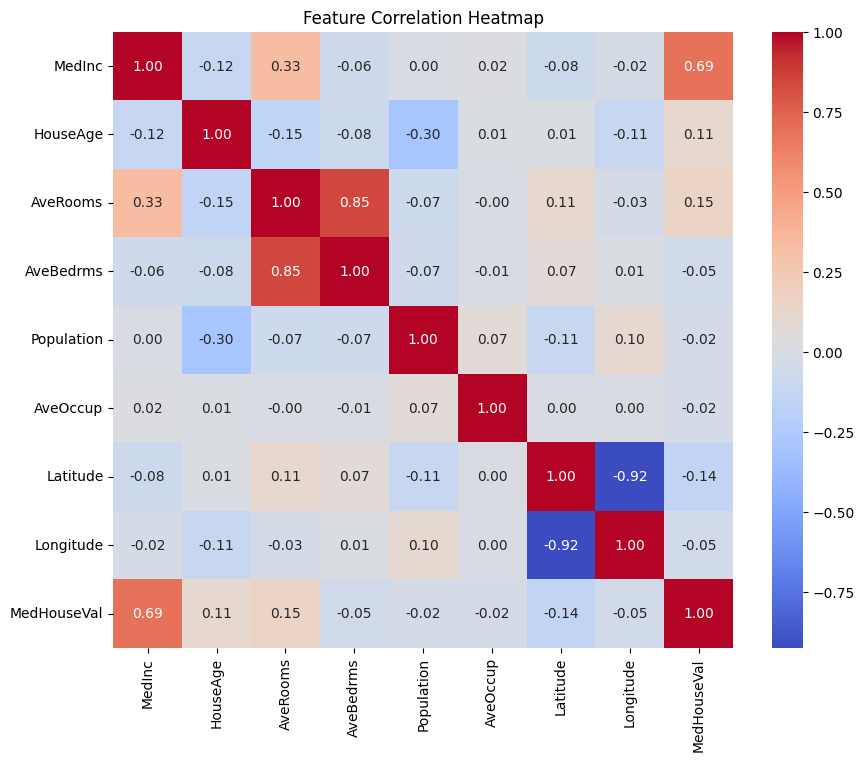

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
# Split & Linear Regression

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))


print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: -37.02327770606409
Coefficients: {'MedInc': np.float64(0.44867490966571666), 'HouseAge': np.float64(0.009724257517904806), 'AveRooms': np.float64(-0.12332334282795815), 'AveBedrms': np.float64(0.7831449067929722), 'Population': np.float64(-2.029620580100075e-06), 'AveOccup': np.float64(-0.003526318487134238), 'Latitude': np.float64(-0.4197924865883604), 'Longitude': np.float64(-0.433708064963987)}
R² Score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


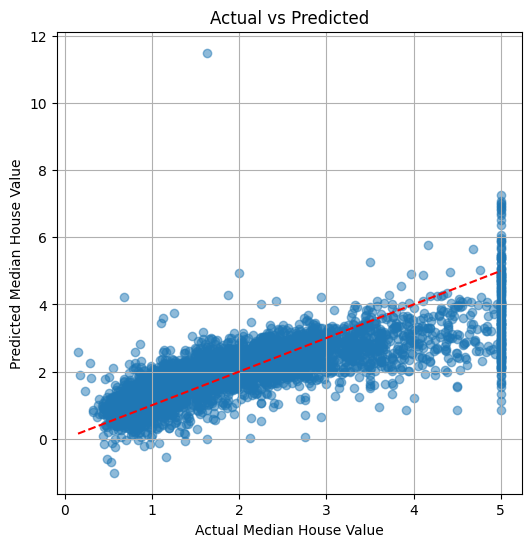

In [15]:
# Predicted Vs actual Values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [11]:
# Model Improvement
top_features = df.corr()['MedHouseVal'].abs().sort_values(ascending=False).index[1:5]
print("Top features:", top_features.tolist())
X_top = df[top_features]


Top features: ['MedInc', 'AveRooms', 'Latitude', 'HouseAge']


In [12]:
# Standardization

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_improved = LinearRegression()
model_improved.fit(X_train, y_train)
y_pred_improved = model_improved.predict(X_test)


In [13]:
# Evaluate
print("Improved R² Score:", r2_score(y_test, y_pred_improved))
print("Improved MAE:", mean_absolute_error(y_test, y_pred_improved))
print("Improved MSE:", mean_squared_error(y_test, y_pred_improved))
print("Improved RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_improved)))

Improved R² Score: 0.5043169272470043
Improved MAE: 0.5993913548627591
Improved MSE: 0.6495475488975627
Improved RMSE: 0.8059451277212133
